<a href="https://colab.research.google.com/github/0204hyoj/schoolAccident/blob/main/%EB%85%B9%EC%A7%80%EC%97%B0%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [ ]:
# basic
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [ ]:
# 파일 경로
file_path = '/content/drive/MyDrive/데이터시각화/학교안전사고 경진대회/녹지.xlsx'
df = pd.read_excel(file_path, header=[0, 1])

# 2. 다중 헤더 결합
df.columns = [' '.join(col).strip() for col in df.columns.values]

In [ ]:
print(df.columns)


Index(['소재지(시군구)별(1) 소재지(시군구)별(1)', '소재지(시군구)별(2) 소재지(시군구)별(2)', '2020 계',
       '2020 계.1', '2020 완충녹지', '2020 완충녹지.1', '2020 경관녹지', '2020 경관녹지.1',
       '2020 연결녹지', '2020 연결녹지.1', '2021 계', '2021 계.1', '2021 완충녹지',
       '2021 완충녹지.1', '2021 경관녹지', '2021 경관녹지.1', '2021 연결녹지', '2021 연결녹지.1',
       '2022 계', '2022 계.1', '2022 완충녹지', '2022 완충녹지.1', '2022 경관녹지',
       '2022 경관녹지.1', '2022 연결녹지', '2022 연결녹지.1'],
      dtype='object')


#2020년도 제주시와 평택시의 녹지 시설 수 비교

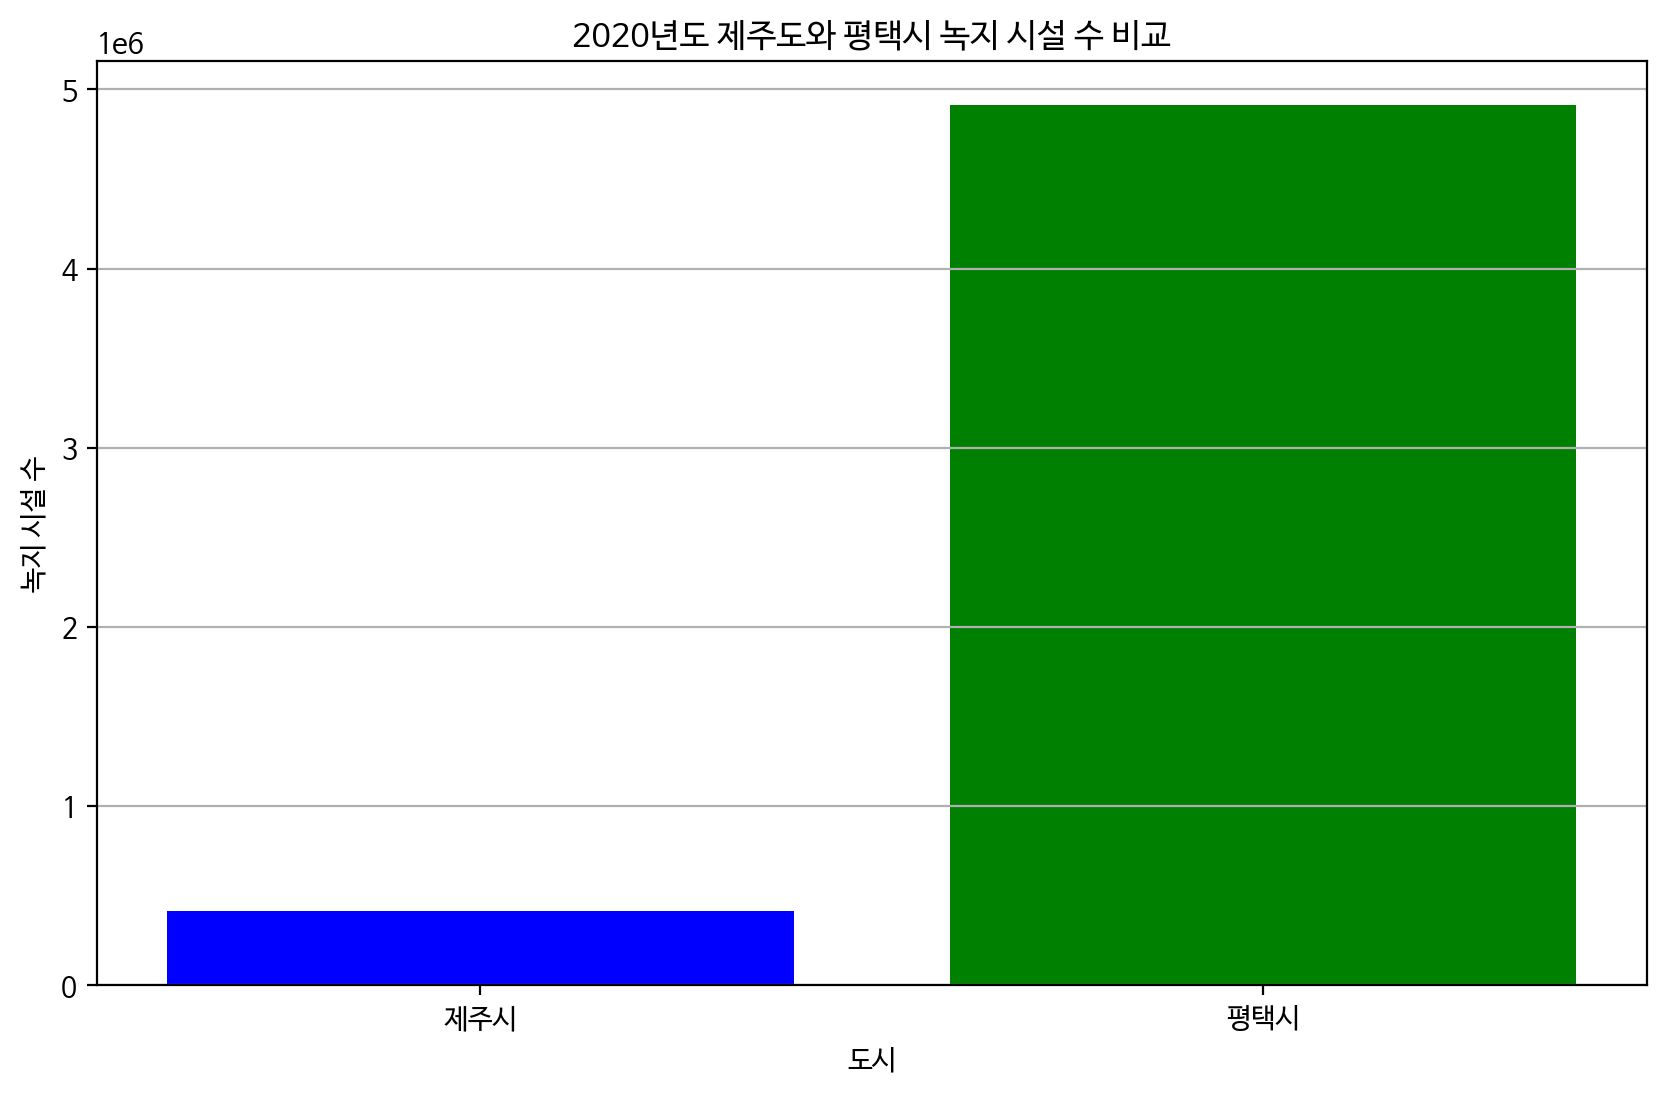

In [ ]:
# 3. 2020년도의 제주시와 평택시의 녹지 시설 수 추출
cities_2020 = ["제주시", "평택시"]
green_facilities_2020 = [df[df['소재지(시군구)별(2) 소재지(시군구)별(2)'] == city]['2020 계.1'].values[0] for city in cities_2020]

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.bar(cities_2020, green_facilities_2020, color=['blue', 'green'])
plt.title("2020년도 제주도와 평택시 녹지 시설 수 비교")
plt.xlabel("도시")
plt.ylabel("녹지 시설 수")
plt.grid(axis='y')
plt.show()

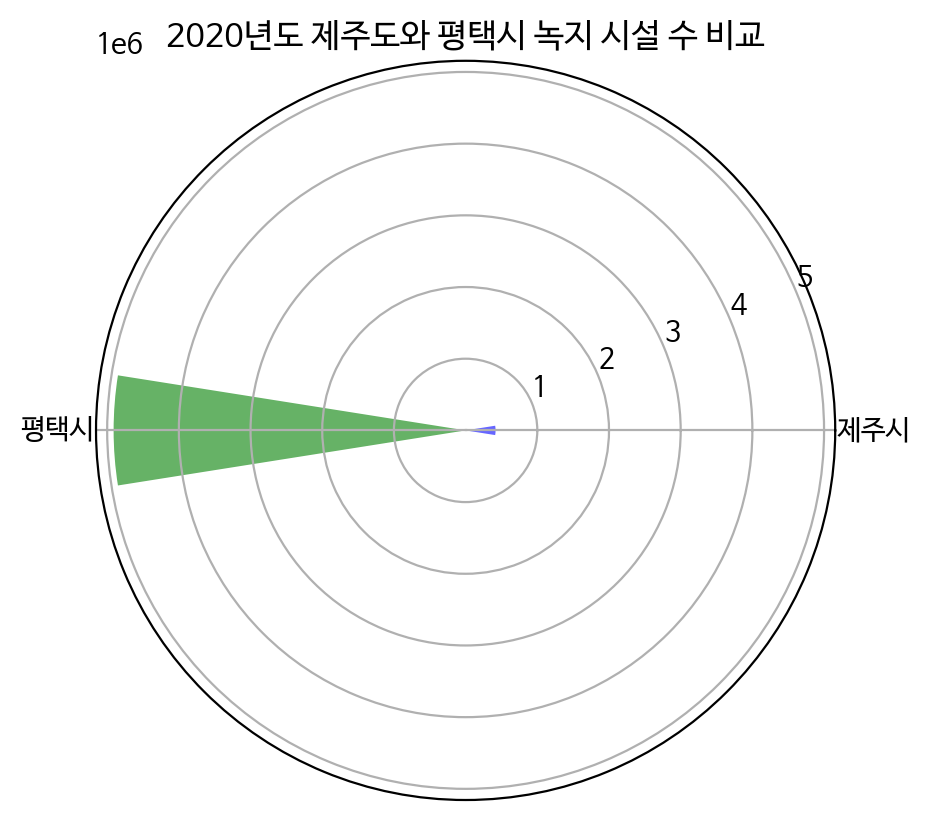

In [ ]:
# 방사형 차트를 그리기 위한 설정
N = len(cities_2020)  # 데이터 포인트 수
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)  # 각도 설정
radii = green_facilities_2020  # 녹지 시설 수 데이터
width = np.pi / 4 * np.array([0.4, 0.4])  # 막대 너비 설정

ax = plt.subplot(111, projection='polar')  # 방사형 차트 설정
bars = ax.bar(theta, radii, width=width, bottom=0.0, align='center')  # 막대 차트 생성

# 각 도시에 따라 다른 색상 설정
for r, bar in zip(radii, bars):
    if r == green_facilities_2020[0]:
        bar.set_facecolor('blue')
    else:
        bar.set_facecolor('green')
    bar.set_alpha(0.6)  # 투명도 설정

# 그래프 제목 및 레이블 설정
ax.set_title("2020년도 제주도와 평택시 녹지 시설 수 비교")
ax.set_xticks(theta)
ax.set_xticklabels(cities_2020)
plt.show()

#2021년도 수원시와 창원시의 녹지 시설 수 비교

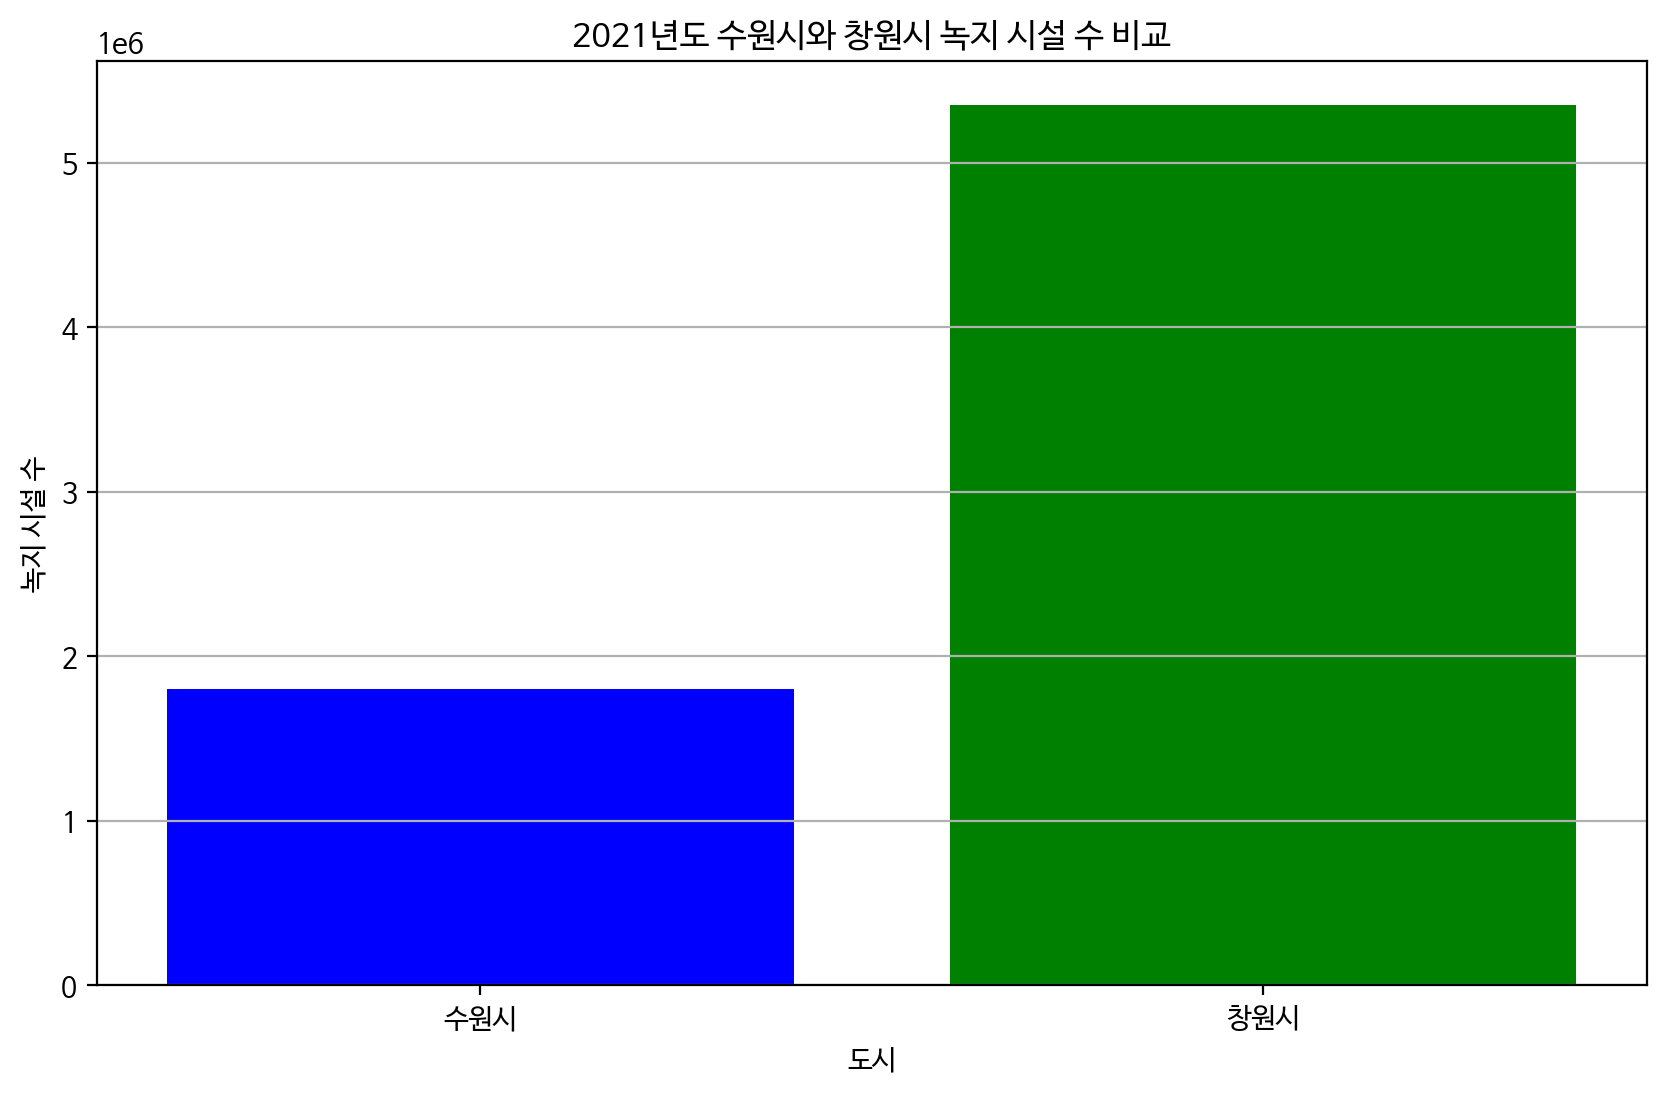

In [ ]:
# 3. 2021년도의 수원시와 창원시의 녹지 시설 수 추출
cities_2021 = ["수원시", "창원시"]
green_facilities_2021 = [df[df['소재지(시군구)별(2) 소재지(시군구)별(2)'] == city]['2021 계.1'].values[0] for city in cities_2021]

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.bar(cities_2021, green_facilities_2021, color=['blue', 'green'])
plt.title("2021년도 수원시와 창원시 녹지 시설 수 비교")
plt.xlabel("도시")
plt.ylabel("녹지 시설 수")
plt.grid(axis='y')
plt.show()

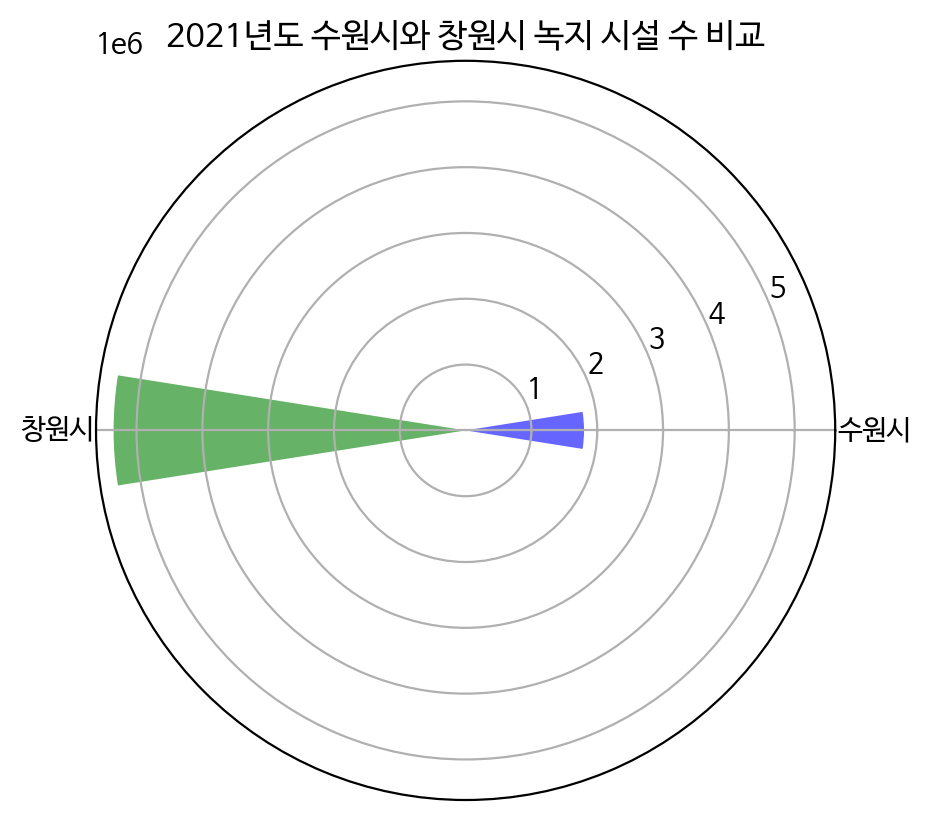

In [ ]:
# 방사형 차트를 그리기 위한 설정
N = len(cities_2021)  # 데이터 포인트 수
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)  # 각도 설정
radii = green_facilities_2021  # 녹지 시설 수 데이터
width = np.pi / 4 * np.array([0.4, 0.4])  # 막대 너비 설정

ax = plt.subplot(111, projection='polar')  # 방사형 차트 설정
bars = ax.bar(theta, radii, width=width, bottom=0.0, align='center')  # 막대 차트 생성

# 각 도시에 따라 다른 색상 설정
for r, bar in zip(radii, bars):
    if r == green_facilities_2021[0]:
        bar.set_facecolor('blue')
    else:
        bar.set_facecolor('green')
    bar.set_alpha(0.6)  # 투명도 설정

# 그래프 제목 및 레이블 설정
ax.set_title("2021년도 수원시와 창원시 녹지 시설 수 비교")
ax.set_xticks(theta)
ax.set_xticklabels(cities_2021)
plt.show()

#2022년도 수원시와 김해시의 녹지 시설 수 비교

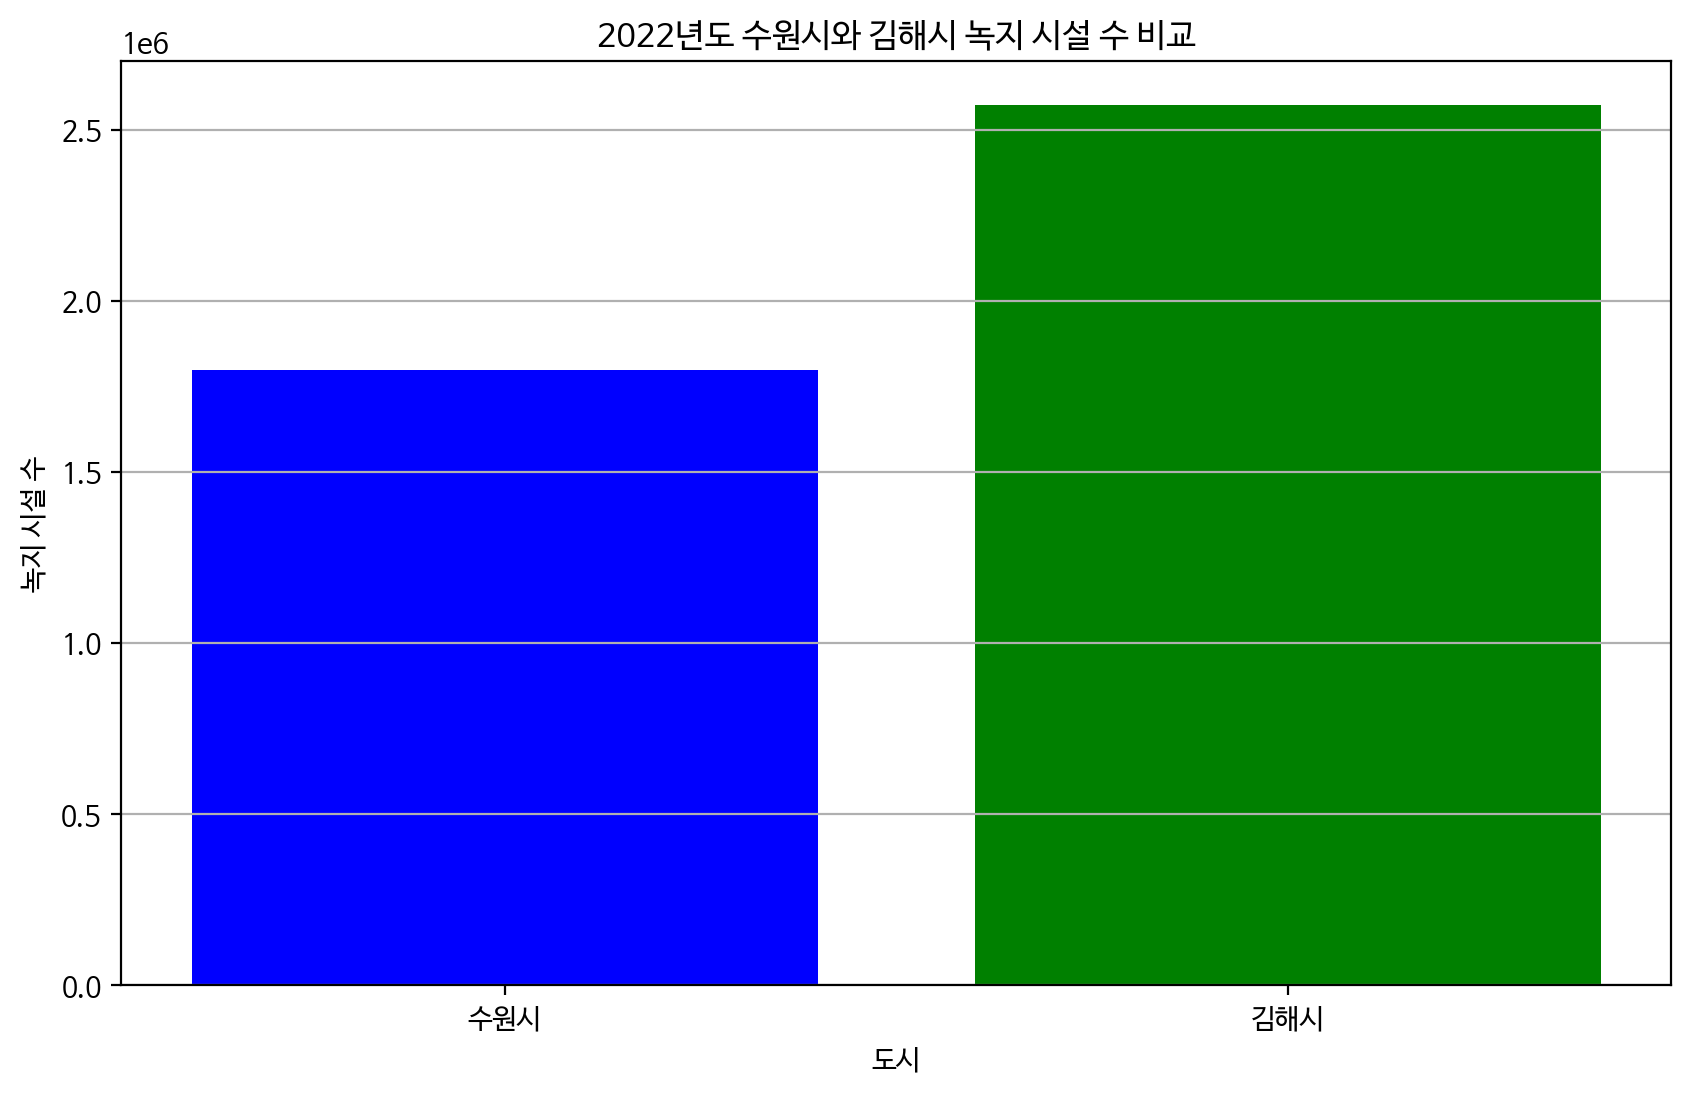

In [ ]:
# 3. 2022년도의 수원시와 김해시의 녹지 시설 수 추출
cities_2022 = ["수원시", "김해시"]
green_facilities_2022 = [df[df['소재지(시군구)별(2) 소재지(시군구)별(2)'] == city]['2022 계.1'].values[0] for city in cities_2022]

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.bar(cities_2022, green_facilities_2022, color=['blue', 'green'])
plt.title("2022년도 수원시와 김해시 녹지 시설 수 비교")
plt.xlabel("도시")
plt.ylabel("녹지 시설 수")
plt.grid(axis='y')
plt.show()

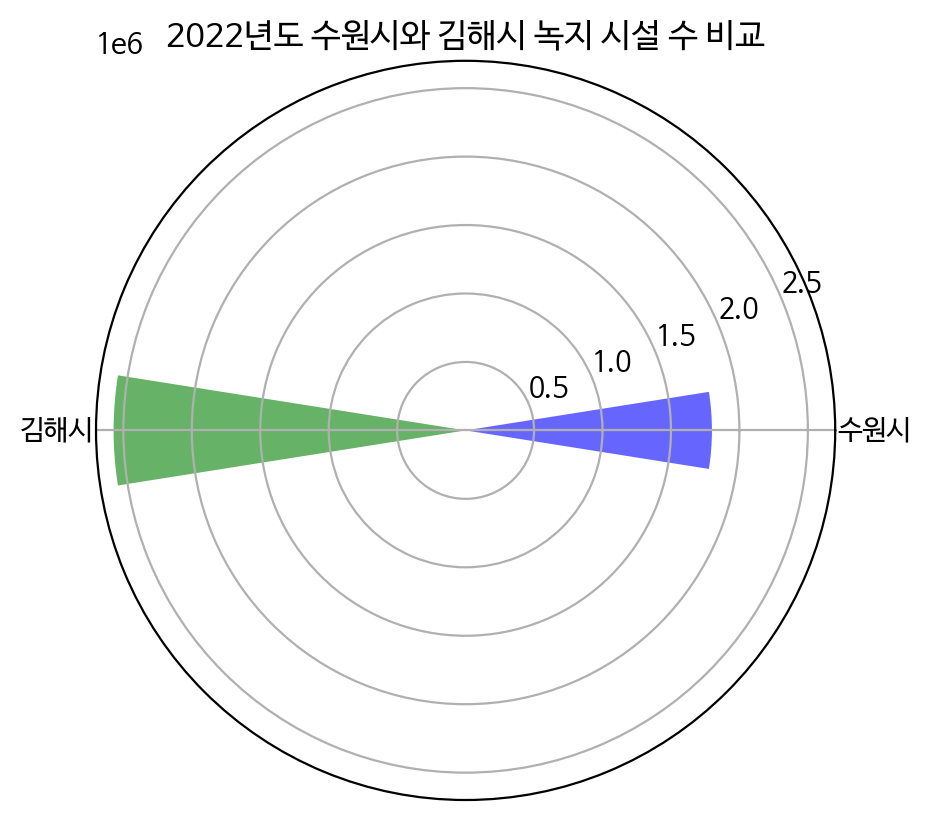

In [ ]:
# 방사형 차트를 그리기 위한 설정
N = len(cities_2022)  # 데이터 포인트 수
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)  # 각도 설정
radii = green_facilities_2022  # 녹지 시설 수 데이터
width = np.pi / 4 * np.array([0.4, 0.4])  # 막대 너비 설정

ax = plt.subplot(111, projection='polar')  # 방사형 차트 설정
bars = ax.bar(theta, radii, width=width, bottom=0.0, align='center')  # 막대 차트 생성

# 각 도시에 따라 다른 색상 설정
for r, bar in zip(radii, bars):
    if r == green_facilities_2022[0]:
        bar.set_facecolor('blue')
    else:
        bar.set_facecolor('green')
    bar.set_alpha(0.6)  # 투명도 설정

# 그래프 제목 및 레이블 설정
ax.set_title("2022년도 수원시와 김해시 녹지 시설 수 비교")
ax.set_xticks(theta)
ax.set_xticklabels(cities_2022)
plt.show()

##하나로

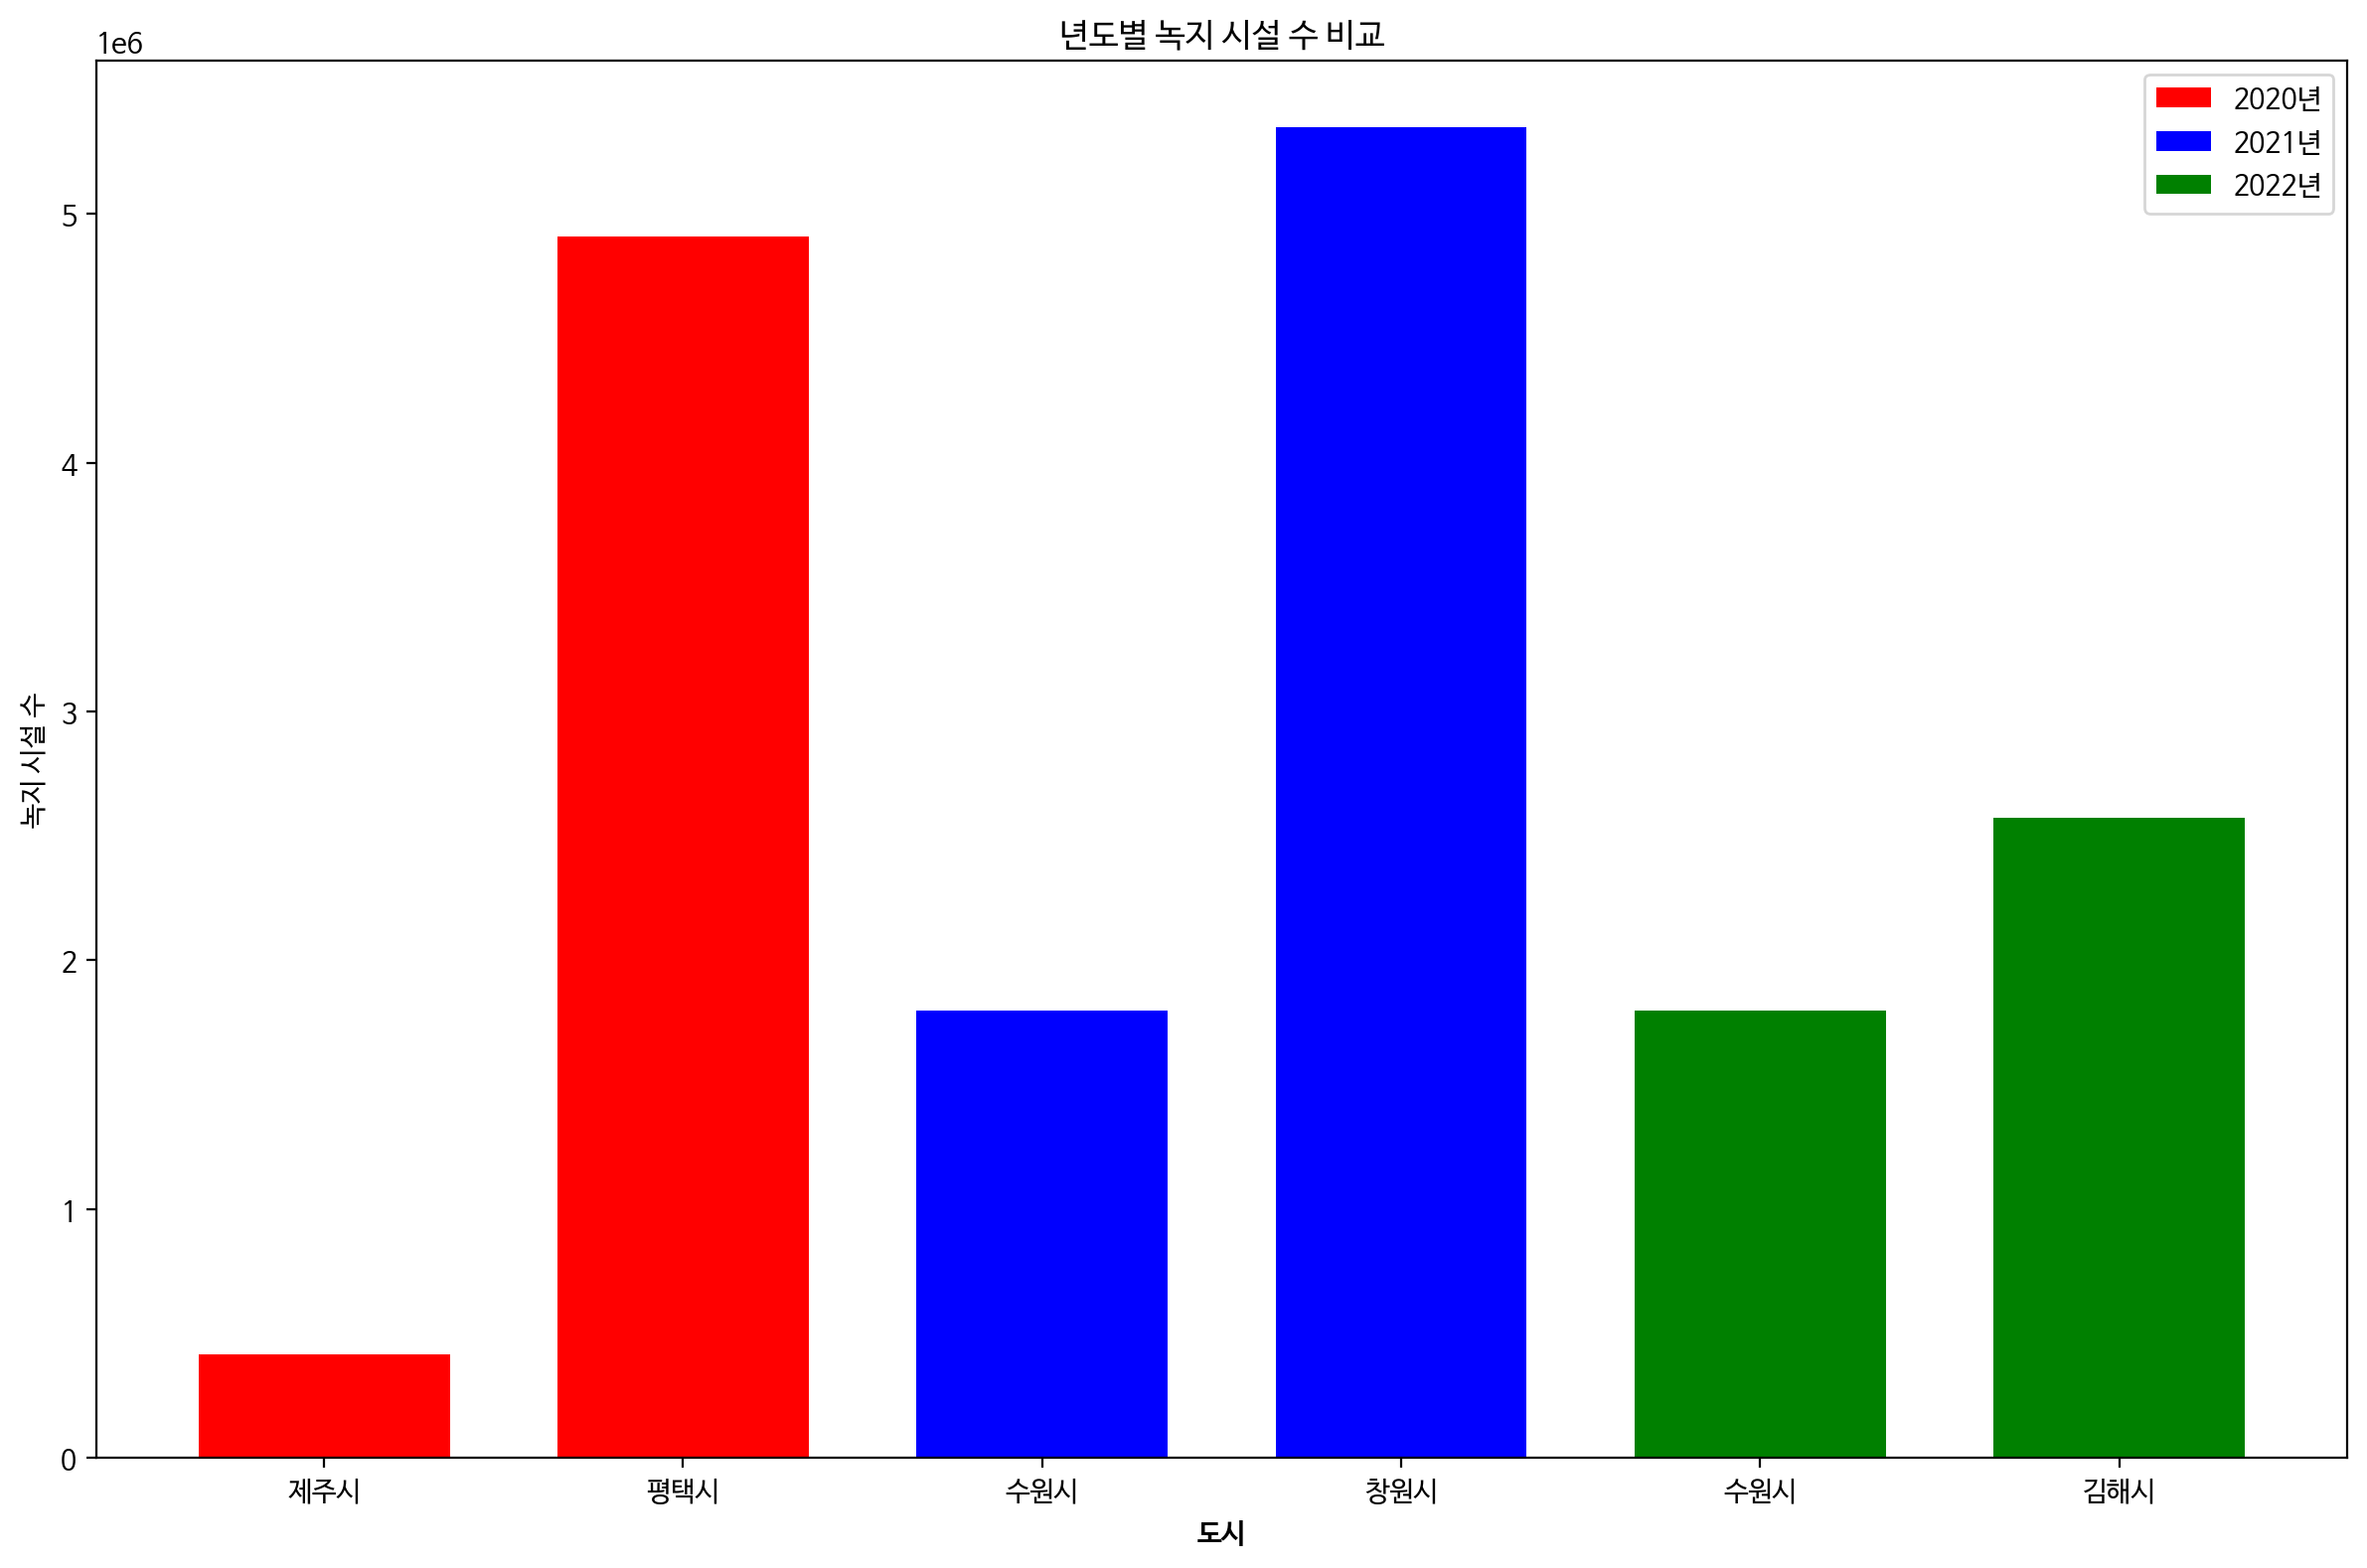

In [ ]:
# 데이터 추출
cities_2020 = ["제주시", "평택시"]
green_facilities_2020 = [df[df['소재지(시군구)별(2) 소재지(시군구)별(2)'] == city]['2020 계.1'].values[0] for city in cities_2020]

cities_2021 = ["수원시", "창원시"]
green_facilities_2021 = [df[df['소재지(시군구)별(2) 소재지(시군구)별(2)'] == city]['2021 계.1'].values[0] for city in cities_2021]

cities_2022 = ["수원시", "김해시"]
green_facilities_2022 = [df[df['소재지(시군구)별(2) 소재지(시군구)별(2)'] == city]['2022 계.1'].values[0] for city in cities_2022]

# 모든 도시 리스트 합치기
all_cities = cities_2020 + cities_2021 + cities_2022

# 시각화
bar_width = 0.7
# 위치 계산
r1 = np.arange(len(cities_2020))
r2 = [x + len(cities_2020) for x in np.arange(len(cities_2021))]
r3 = [x + len(cities_2020) + len(cities_2021) for x in np.arange(len(cities_2022))]

plt.figure(figsize=(12, 8))

# 각 년도별로 데이터를 그래프에 추가
plt.bar(r1, green_facilities_2020, color='red', width=bar_width, label='2020년')
plt.bar(r2, green_facilities_2021, color='blue', width=bar_width, label='2021년')
plt.bar(r3, green_facilities_2022, color='green', width=bar_width, label='2022년')

# 그래프 레이블, 타이틀, 레전드 설정
plt.xlabel('도시', fontweight='bold')
# 바의 중심 위치 계산
all_positions = list(r1) + list(r2) + list(r3)

# x축 설정
plt.xticks(all_positions, all_cities)

plt.ylabel("녹지 시설 수")
plt.title("년도별 녹지 시설 수 비교")
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()
